<h1> Forecasting Univariate Time Series Data with Least Squares Linear Regression </h1>

In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


<h1>Importing Datasets</h1>


In [139]:
df2022 = pd.read_csv(r"C:\Users\praya\OneDrive\Desktop\code\Financial Analysis\Monthly Expenditures Over 2022.txt", delimiter = '\t')
df2022_sources = pd.read_csv(r"C:\Users\praya\OneDrive\Desktop\code\Financial Analysis\ExpenditureSources2022.txt", delimiter = ',')
df2021 = pd.read_csv(r"C:\Users\praya\OneDrive\Desktop\code\Financial Analysis\Monthly Expenditures Over 2021.txt", delimiter = '\t')
df2021_income = pd.read_csv(r"C:\Users\praya\OneDrive\Desktop\code\Financial Analysis\Monthly Income Over 2021.txt", delimiter = ',')
df2022_income = pd.read_csv(r"C:\Users\praya\OneDrive\Desktop\code\Financial Analysis\Monthly Income Over 2022.txt", delimiter = ',')

<h1>Motivation</h1>

<p>I aim to analyze my monthly spendings over the year of 2022 for meaningful trends that can be used to help me better handle my finaces. Furthermore, I aim to develop an ML Model to forecast my expenditures for the first two months of 2023. The reason I choose to develop this project is because as I grow older, keeping track of my expenses does not only become more difficult, but also more deceiving. Consider for a moment my expenses in the year 2021, before I had a regular and sustainable source of income.

Note that throughout this project, all values are in CAD, no governmental aid for school and tuition is included in the calculations or projections, but all other payments made towards school are included.</p>

Total Spending over 2021: $688.33


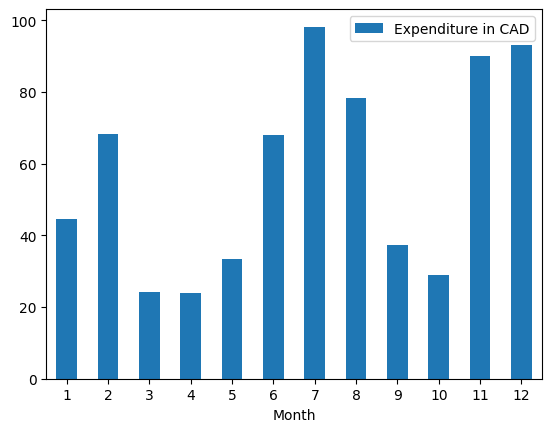

In [140]:
df2021.plot.bar(x = "Month", y = "Expenditure in CAD", rot = 0)
print(f"Total Spending over 2021: ${df2021['Expenditure in CAD'].sum()}")

<h2> Now, consider my monthly income over 2021. <h2>

([<matplotlib.patches.Wedge at 0x1d91fc95e40>,
 [Text(-0.8327650325642234, 0.7186810144551671, 'Parents'),
  Text(0.8327650662081088, -0.7186809754706217, 'PrivateTutoring')])

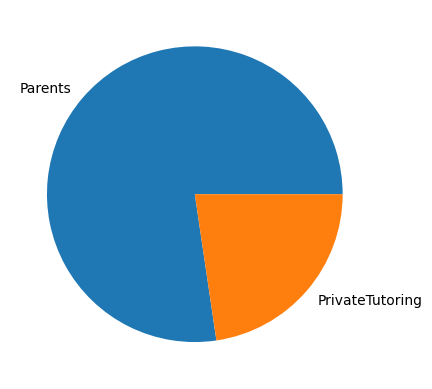

In [141]:
sources_of_income = df2021_income['Source']
incomes = df2021_income['Amount']

plt.pie(incomes, labels = sources_of_income)

In [142]:
df2021_income.head(2)

,Source,Amount
0,Parents,532.33
1,PrivateTutoring,156.00


<p>It's obvious that I was able to spend money that I myself did not technically make (if we do not count Parents as a source of income for a moment). Thus, financial responsibility and budgeting were both illusions to me. However, as of the start of 2022, I began earning more for myself. Thus, I aim to hold myself acconutable by improving on spending habits, which I will identify through this analysis.</p>

<h2>Consider my monthly income over 2022.</h2>

Total Money Earned over 2022: $2249.17


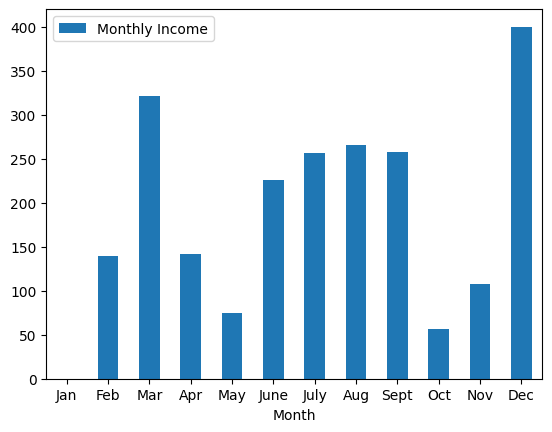

In [143]:
df2022_income.plot.bar(x = "Month", y = "Monthly Income", rot = 0)
print(f"Total Money Earned over 2022: ${round(df2022_income['Monthly Income'].sum(), 3)}")

([<matplotlib.patches.Wedge at 0x1d920d6ca30>,
 [Text(0.5369587670522717, 0.9600392088272772, 'Part-time Work'),
  Text(-0.9379042130765983, 0.574748368499787, 'Summer Job'),
  Text(-0.7982403751371582, -0.7568436453461767, 'Private Tutoring'),
  Text(0.8453290958699893, -0.8232974673079144, 'Parents')])

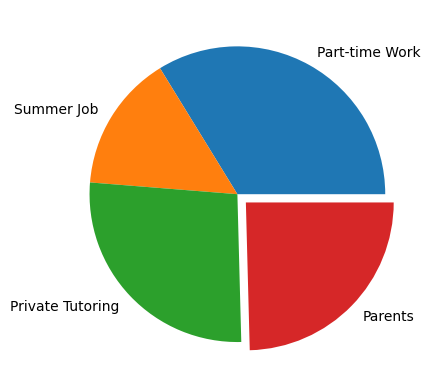

In [144]:
labels = ["Part-time Work", "Summer Job", "Private Tutoring", "Parents"]
incomes = [946.76, 419.59, 748.26, 689.16]
explode = [0, 0, 0, 0.08]

plt.pie(incomes, labels = labels, explode = explode)

<p>Note that even though I earned more money than I had last year, my parents still had to pay more for me this year. Obviously this is because my expenses have increased. Thus, this is further motivation for me to try and limit my spendings. I can do so by analyzing my expenditure throughout 2022.</p>

<h2>Thus, consider my Monthly Spendings over 2022.</h2>

In [160]:
print(f"Total Expenditure over 2022: ${round(df2022['Expenditure in CAD'].sum(), 3)}")

Total Expenditure over 2022: $2246.96


In [161]:
df2022.head(12)

,Month,Expenditure in CAD
0,1,70.30
1,2,84.63
2,3,123.11
3,4,130.88
4,5,136.28
5,6,211.35
6,7,330.64
7,8,373.22
8,9,323.38
9,10,127.08


([<matplotlib.patches.Wedge at 0x1d92120b100>,
 [Text(1.060862127433616, 0.29081187488997423, 'Gym'),
  Text(0.5169605786122434, 0.9709540463692886, 'Food'),
  Text(-0.8696541095037122, 0.6735738488267679, 'RecreationalActivities'),
  Text(-0.7428398113934005, -0.8112884903713459, 'Family'),
  Text(0.734887124841207, -0.8184991837153073, 'School')])

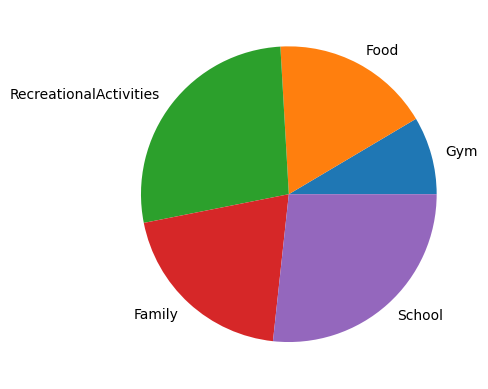

In [159]:
sources_of_expenditure = df2022_sources['Source']
amounts_of_expenditure = df2022_sources['Amount']

plt.pie(amounts_of_expenditure, labels = sources_of_expenditure)

<p>While School does take up a huge portion of my expenses, it's reasonable for it to do so. Moreover, I can count on University to be a large source of spending in the future as well, which is helpful for the Model which I will train with this data. Conversely, categories such as Food and Gym will decrease greatly because these facilities are provided by my University While this may imply that a major decrease in expenses is on its way in 2023, a quick look at Figure 1.1 may convince you otherwise. Thus, at this point it makes sense to perform some basic tests to see if this data is legible for a linear regression forecasting.</p>

<h2> Checking if the Data is Normally Distributed</h2>

<h3>Figure 1.1<h3>

<BarContainer object of 12 artists>

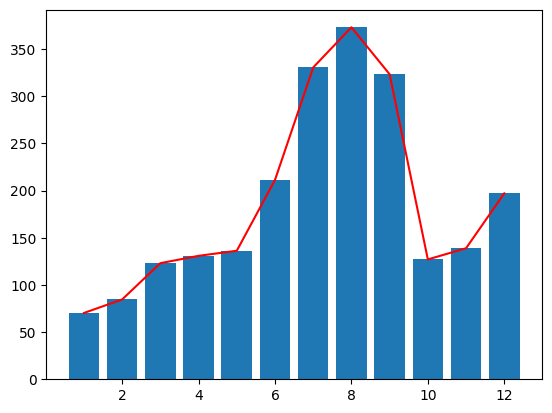

In [148]:
data = df2022.values

months = list(range(1, 13)) # x-coordinates
expenditures = [row[1] for row in data] # y-coordinates

plt.plot(months, expenditures, color = 'red')
plt.bar(months, expenditures)





<h7> While the Data isn't perfectly normally distributed, as indicated by fluctuations caused by outliers / anomalies during Months 3, 11, and 12, we can disregard these anomalies to provide a crude forecasting.</h7>

<p>In future chagnes and updates, I would consider a QQ-Plot, as well as Statistical Tests such as the D'Agostino-Pearson Test, to test how well the data is normally distributed. Depending on the results, other regression models may or may not be considered. </p>

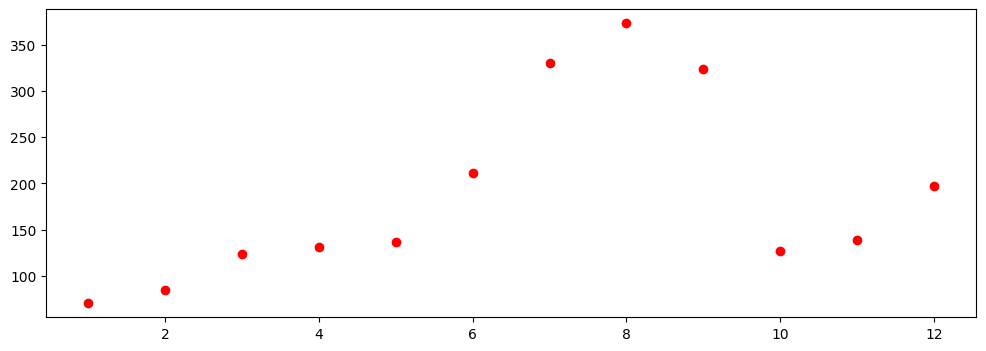

In [149]:
data = df2022.values

months = list(range(1, 13)) # x-coordinates
expenditures = [row[1] for row in data] # y-coordinates

plt.figure(figsize=(12, 4))
plt.scatter(months, expenditures, color = 'red')
plt.show()


<p>Ignoring slight anomalies, as time went on, my spendings per month increased.
    
    These anomalies can be further analyzed and taken into account for in the model. For example, spendings dropped from more than $300 per month in August and September to less than $150 per month in October. This decline makes sense when understanding the context from when the data was retrieved. University began in mid-to-early September, which apparently dampended my ability to spend as much money.</p>

# Data Preprocessing

In [150]:
x = np.array(months)
y = np.array(expenditures)

In [151]:
# Splitting the data into two parts: A Testing Dataset and a Training Dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

def twodify(arr):
    return np.array([[elm] for elm in arr])

x_train, x_test, y_train, y_test = twodify(x_train), twodify(x_test), twodify(y_train), twodify(y_test)


In [152]:
# Model Selectoin

In [153]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Training Model
#  --> Training Datasets will provide the model with enough data for the model to develop the coefficients of determination.

lin_reg.fit(x_train, y_train)

LinearRegression()

In [154]:
# Getting Equation of Trend Line
print(f"y = {round(lin_reg.coef_[0][0], 3)}x + {round(lin_reg.intercept_[0], 3)}")

y = 14.8x + 87.073


<h1>Comparing the Model to Actual Values</h1>

In [155]:
# Creating Data Frame containing model's values and actual values.

def lobf(x: float):
    return round(lin_reg.coef_[0][0] * x + lin_reg.intercept_[0], 3)

df1 = pd.DataFrame({"Real Values" : y_train.flatten(), "Model's Values" : [lobf(i) for i in range(1, 10)]})

df1.head(12)



,Real Values,Model's Values
0,138.93,101.874
1,123.11,116.674
2,323.38,131.474
3,84.63,146.275
4,373.22,161.075
5,127.08,175.876
6,130.88,190.676
7,70.30,205.476
8,211.35,220.277


<AxesSubplot: >

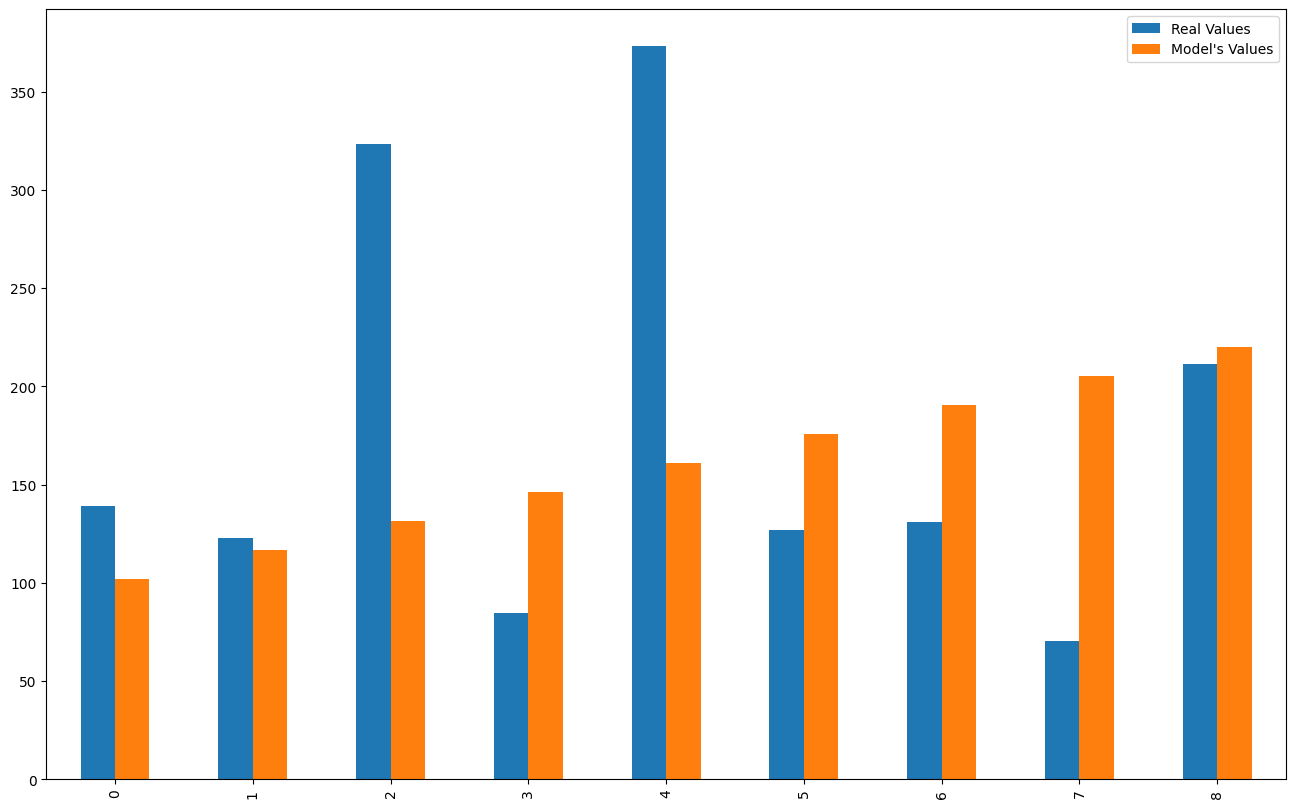

In [156]:
df2 = df1.head(12)
df2.plot(kind = "bar", figsize = (16, 10))

<p> The Model seems as if it does not predict my monthly spendings without a large error. There are a few reasons for that. Firstly, the model was trained using a very small dataset, transactions made over only the past 12 months. If the number of months increases, so would the Model's accuracy. Moreover, the Model is most innacurate for outlier data, which was expected. So then, why would I choose a linear regression to help me forecast my spendings?</p>

<h3> Reasons why a Linear Regression was a 'Good Fit':</h3>
<ul>
    <li>The Model works to provide quick and rough estimates which help convey an idea to me about my monthly spendings. See Conclusion.</li>
    <li>Linear Regression models don't take into account outliers, which are datapoints that are the cause of abrubpt life events; I don't want my model to try and predicate when life is going to suddenly become more expensive based solely on data from the last 12 months.</li>
    <li>As aforementioned, the model's accuracy grows as the amount of data does. Thus, this project is easily scalable; and, as it gets bigger, it works better.</li>
    <li>Easy and accessible regression method to pracice data visualization and analysis with.</li>
    <li>Moreover, the dataset is fit for a linear regression analysis, as shown above.</li>
</ul>

<h1>Predicting my Monthly Spendings for January and February of 2023</h1>

Monthly Spending in Jan 2023: $279.478
Monthly Spending in Feb 2023: $294.279


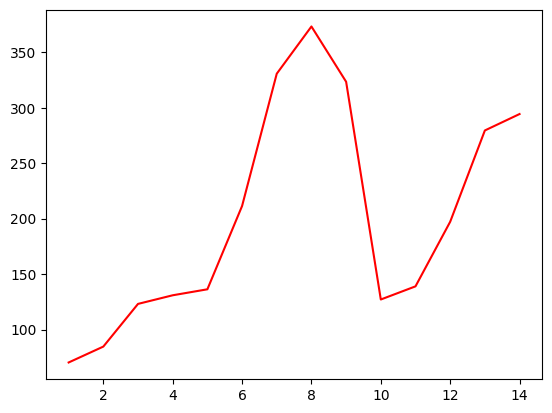

In [157]:
plt.plot(months + [13, 14], expenditures + [lobf(13), lobf(14)], color = 'red')
print(f"Monthly Spending in Jan 2023: ${lobf(13)}")
print(f"Monthly Spending in Feb 2023: ${lobf(14)}")

<p>The Model predicts that my expenses will rise in January & February, which is a sensible prediction considering the trend my spending habits have established from October to December.</p>

<h1>Conclusion</h1>

<p>The data analysis performed on my monthly spendings in 2022 reveals that whlie university expenses are abundant and reoccuring, they help cover costs in other areas of my life, such as recreation, food, and gym. Though, this does not necessarily mean that my monthly costs will decrease, as indicated by the trends trailing the last few months of 2022. Moreover, the linear regression also sensibly predicts, based on albeit not the strongest linear correlation, that my expenses will infact increase. Despite the discrepancies in the data which result in the model's slight inaccuracies, I believe that it is sensible to expect an increase in monthly expenses for reasons aforementioned.<br>

I believe this project gave me strong insight into my own financial habbits, but also helped me realize how much more control I have over my money than I thought. Moreover, working with  various data science libraries in Python (NumPy, Seaborn, Pandas, Matplot, and SciKit Learn) gave me a strong understanding of the strong abilities of code when it comes to statistics and conveying meaningful data analysis.</p>